<a href="https://colab.research.google.com/github/staytunewithdotnet/learn-data-science/blob/main/liner_regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


12.209071995565687 6.610258157047384


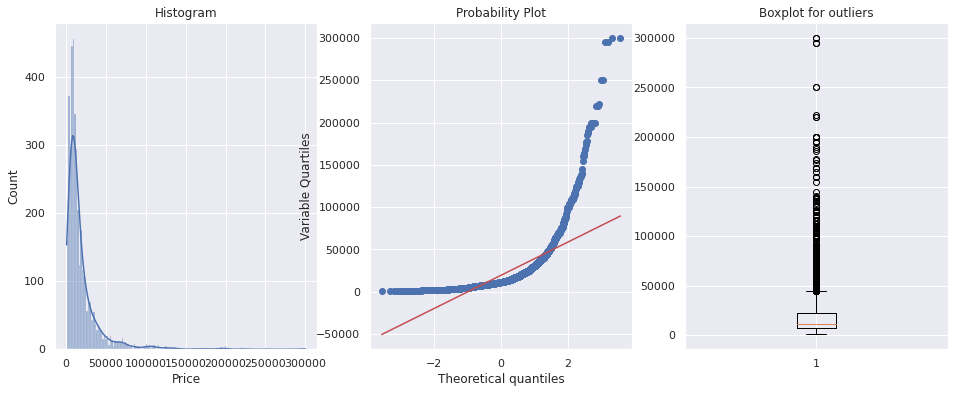

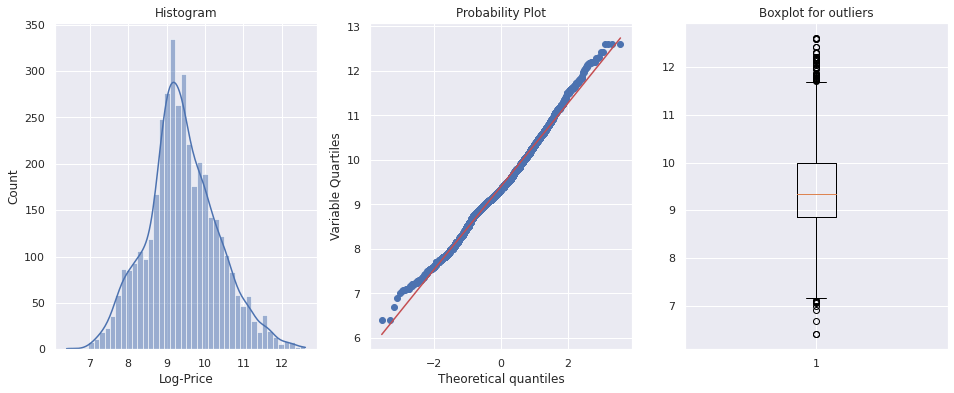

In [1]:
# import relevant libarries
import numpy as np
import pandas as pd
import statsmodels.api as sms
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load raw data
raw_data=pd.read_csv('1.04.Real-life-example.csv')

# descriptive variables
raw_data.describe(include='all')

# drop unnecesarry data
data=raw_data.drop(['Model'],axis=1)
data

# dealing with missing values
data.isnull().sum()
data_no_mv= data.dropna(axis=0)
data_no_mv.isnull().sum()

#plt.scatter(x=data_no_mv['Price'],y=data_no_mv[''])

# Check Outliers
def check_outliers(df,variable):
    plt.figure(figsize=(16,6))
    ax=plt.subplot(1,3,1)
    plt.title('Histogram')
    # histogram plot
    sns.histplot(data=df[variable],kde=True,ax=ax)
    # Distribution plot
    # sns.displot(data=df[variable],kde=True,)
    plt.subplot(1,3,2)
    plt.title('Probability')        
    st.probplot(x=df[variable],dist='norm',plot=plt)
    plt.ylabel('Variable Quartiles')
    #box plot
    plt.subplot(1,3,3)
    plt.boxplot(x=df[variable])
    plt.title('Boxplot for outliers')   
    plt.plot()

def find_normal_outliers(df,col):
    upper_limit=df[col].mean()+3*df[col].std()    
    lower_limit=df[col].mean()-3*df[col].std()    
    print(upper_limit,lower_limit)
check_outliers(data_no_mv,'Price')  

data_no_mv['Log-Price']=np.log(data_no_mv['Price'])
data_no_mv.reset_index()

check_outliers(data_no_mv,'Log-Price') 
find_normal_outliers(data_no_mv,'Log-Price')


